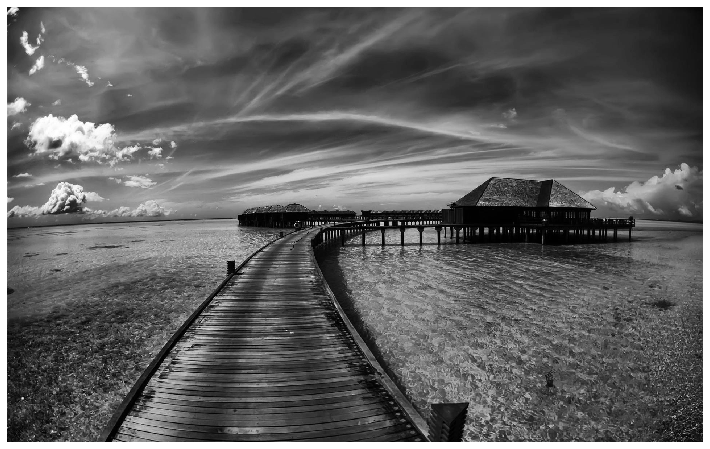

In [13]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

A = imread('serene.jpg')
X = np.mean(A, -1);

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

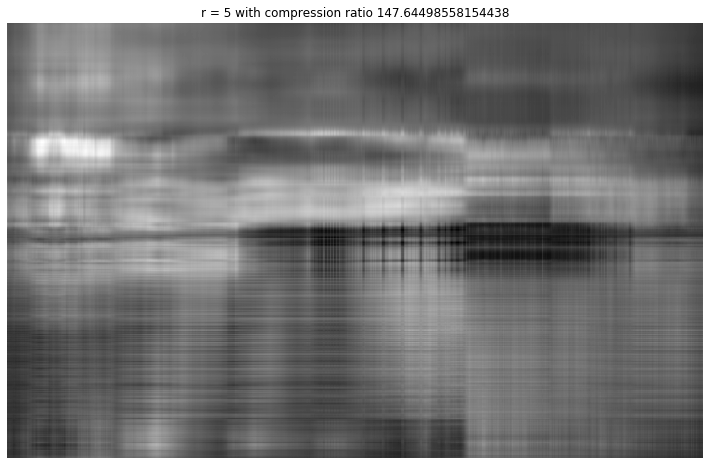

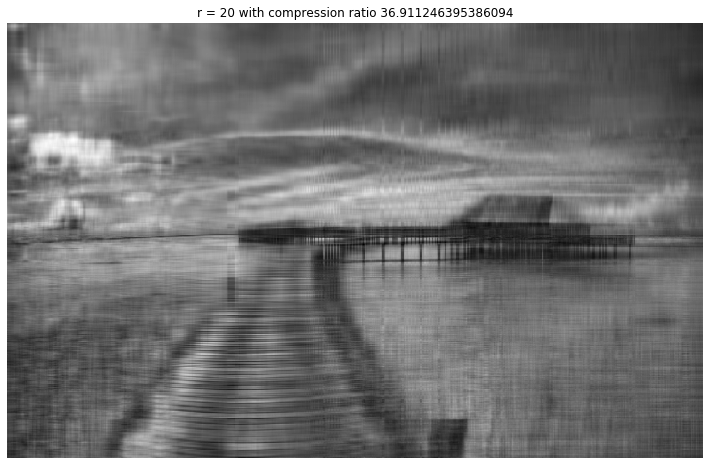

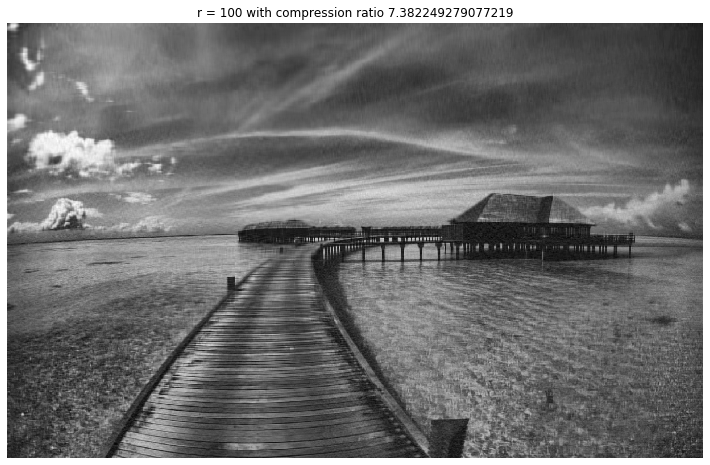

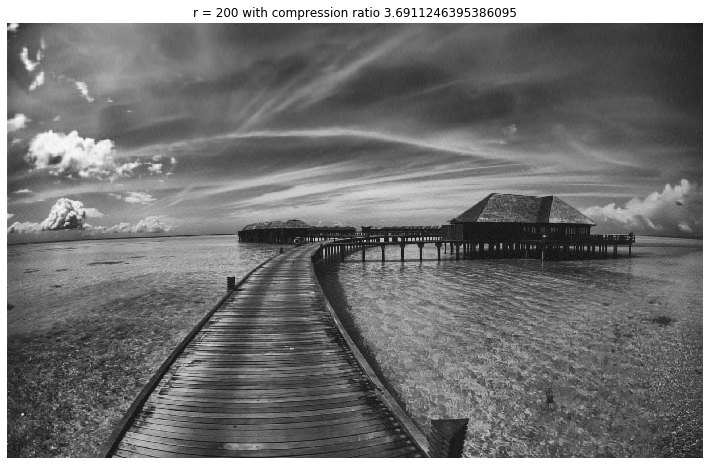

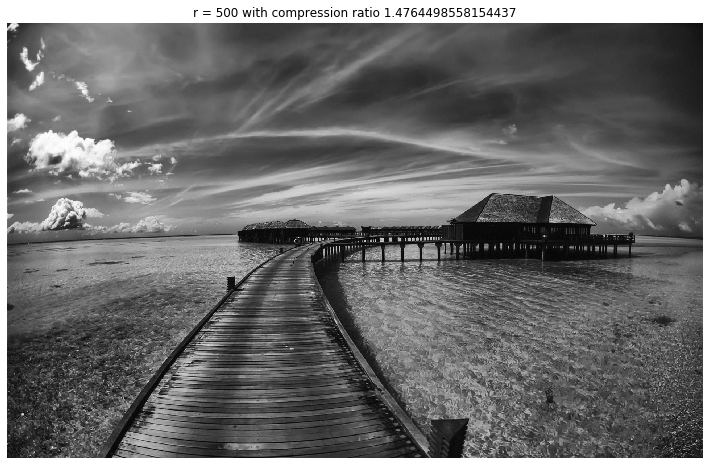

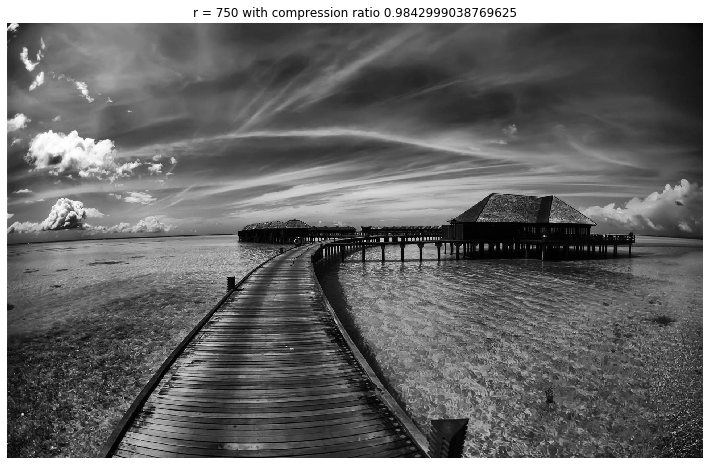

In [31]:
U,S,VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j=0
for r in (5,20,100,200,500,750):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j+=1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    m = X.shape[0]
    n = X.shape[1]
    plt.title('r = {} with compression ratio {}'.format(r,m*n/(r*(m+n+1)) ))
    plt.show()

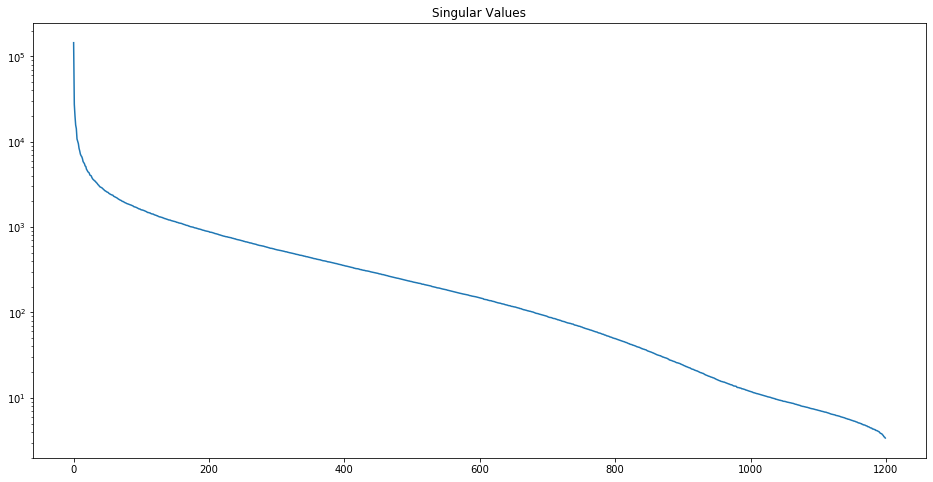

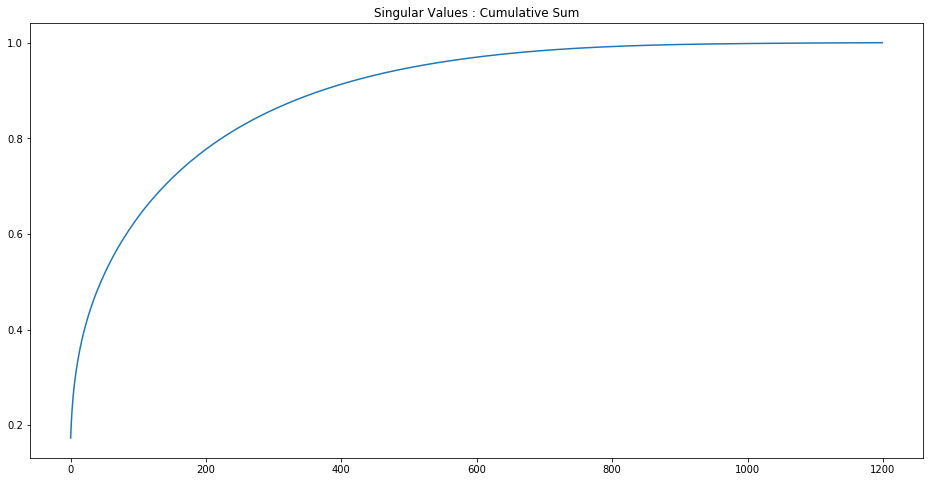

In [16]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(1)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values : Cumulative Sum')
plt.show()

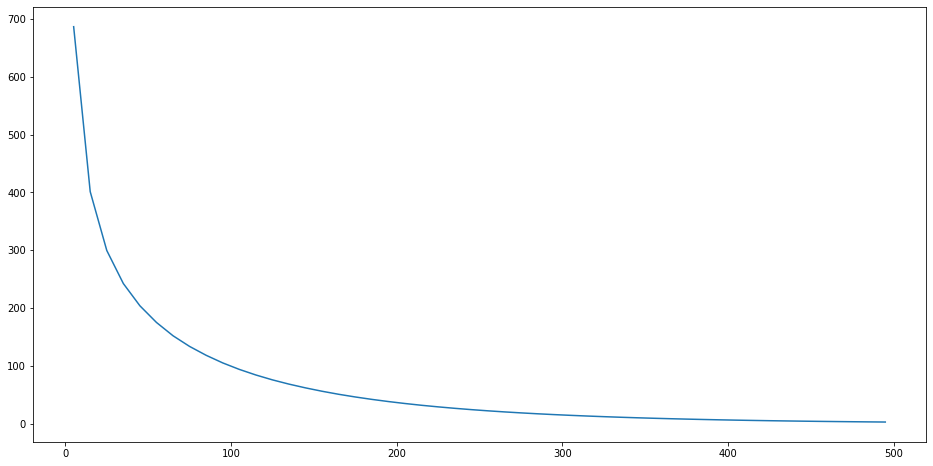

In [28]:
from sklearn import metrics

y = []
for r in range(5,500,10):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    y.append(metrics.mean_squared_error(X,Xapprox))
x = list(range(5,500,10))
# print(len(x),len(y))
plt.plot(list(range(5,500,10)),y)